<a href="https://colab.research.google.com/github/Geet0560/Quantum-Embedding-Kernel_QCG/blob/main/Quantum_Embedding_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

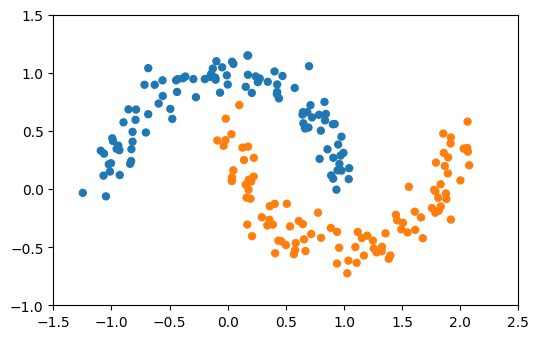

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

def generate_moons_dataset(samples=200, noise=0.1):
    X, Y = make_moons(n_samples=samples, noise=noise)
    colors = ['#1f77b4' if y == 0 else '#ff7f0e' for y in Y]
    return X, Y, colors

X, Y, colors = generate_moons_dataset(samples=200, noise=0.1)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], c=colors, s=25, marker='o')
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-1, 1.5)
ax.set_aspect('equal')
plt.show()


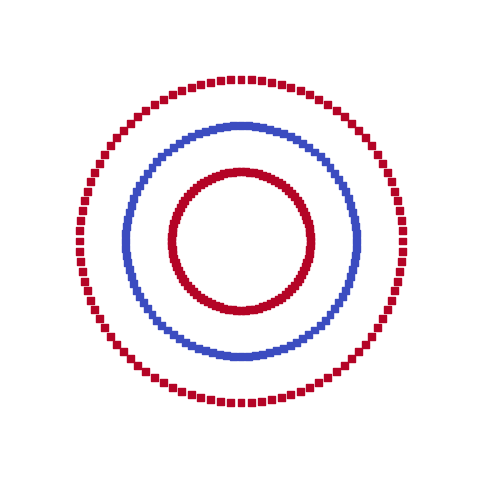

In [70]:
def _make_ring_data(num_points, radius):
    angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    return x, y

def make_triple_cake_data(num_points):
    num_points_per_ring = num_points // 3
    x1, y1 = _make_ring_data(num_points_per_ring, 0.7)
    x2, y2 = _make_ring_data(num_points_per_ring, 0.5)
    x3, y3 = _make_ring_data(num_points_per_ring, 0.3)

    x = np.hstack([x1, x2, x3])
    y = np.hstack([y1, y2, y3])

    X = np.vstack([x, y]).T

    labels = np.hstack([np.ones(num_points_per_ring) * 1,
                        np.ones(num_points_per_ring) * -1,
                        np.ones(num_points_per_ring) * 1])

    Y = labels.astype(int)

    return X, Y


np.random.seed(2468)
X_triple_cake, Y_triple_cake = make_triple_cake_data(300)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_triple_cake[:, 0], X_triple_cake[:, 1], c=Y_triple_cake, cmap='coolwarm', s=25, marker='s')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

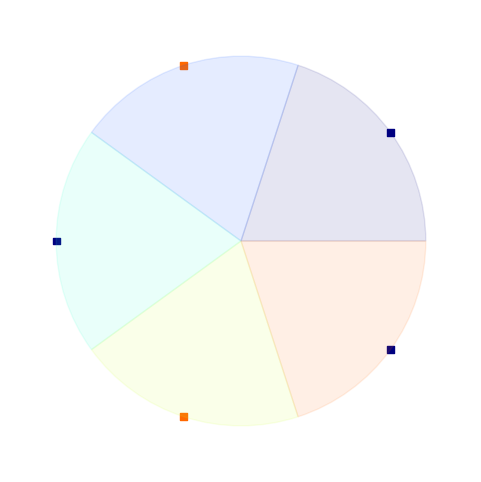

In [71]:
def _make_new_sector_data(num_sectors):
    center_indices = np.arange(num_sectors)
    sector_angle = 2 * np.pi / num_sectors
    angles = (center_indices + 0.5) * sector_angle
    radius = 0.8

    x = radius * np.cos(angles)
    y = radius * np.sin(angles)

    colors = [plt.cm.jet(i / float(num_sectors)) for i in range(num_sectors)]

    labels = np.arange(num_sectors) % 2

    return x, y, labels, colors


def make_new_sector_dataset(num_sectors):
    x, y, labels, colors = _make_new_sector_data(num_sectors)

    X = np.vstack([x, y]).T
    Y = labels.astype(int)

    return X, Y, colors

import matplotlib.pyplot as plt
import matplotlib as mpl
from pennylane import numpy as np
num_sectors = 5
X_new_sector, Y_new_sector, colors_new_sector = make_new_sector_dataset(num_sectors)

fig, ax = plt.subplots(figsize=(6, 6))
cmap = mpl.colors.ListedColormap(colors_new_sector)
ax.scatter(X_new_sector[:, 0], X_new_sector[:, 1], c=Y_new_sector, cmap=cmap, s=25, marker='s')

for i in range(num_sectors):
    color = colors_new_sector[i]
    ax.add_artist(mpl.patches.Wedge((0, 0), 0.8, i * 360 / num_sectors, (i + 1) * 360 / num_sectors, color=color, alpha=0.1))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.show()

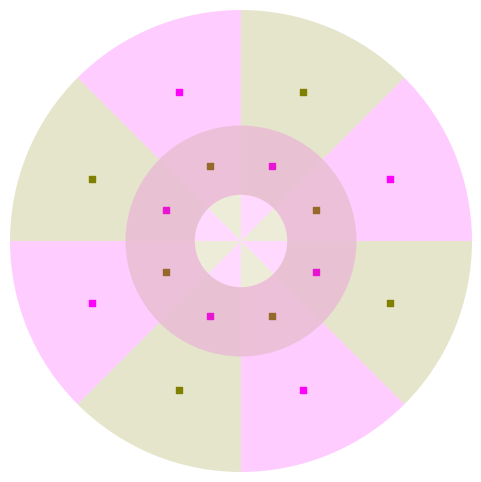

In [75]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pennylane import numpy as np

def _make_circular_data(num_sectors):
    center_indices = np.array(range(0, num_sectors))
    sector_angle = 2 * np.pi / num_sectors
    angles = (center_indices + 0.5) * sector_angle
    x = 0.7 * np.cos(angles)
    y = 0.7 * np.sin(angles)
    labels = 2 * np.remainder(np.floor_divide(angles, sector_angle), 2) - 1

    return x, y, labels

def make_double_cake_data(num_sectors):
    x1, y1, labels1 = _make_circular_data(num_sectors)
    x2, y2, labels2 = _make_circular_data(num_sectors)

    x = np.hstack([x1, 0.5 * x2])
    y = np.hstack([y1, 0.5 * y2])

    X = np.vstack([x, y]).T

    labels = np.hstack([labels1, -1 * labels2])

    Y = labels.astype(int)

    return X, Y

def plot_double_cake_data(X, Y, ax, num_sectors=None):
    x, y = X.T
    cmap = mpl.colors.ListedColormap(["#FF00FF", "#808000"])
    ax.scatter(x, y, c=Y, cmap=cmap, s=20, marker="s")

    if num_sectors is not None:
        sector_angle = 360 / num_sectors
        for i in range(num_sectors):
            color = ["#FF00FF", "#808000"][(i % 2)]
            other_color = ["#FF00FF", "#808000"][((i + 1) % 2)]
            ax.add_artist(
                mpl.patches.Wedge(
                    (0, 0),
                    1,
                    i * sector_angle,
                    (i + 1) * sector_angle,
                    lw=0,
                    color=color,
                    alpha=0.2,
                    width=0.8,
                )
            )
            ax.add_artist(
                mpl.patches.Wedge(
                    (0, 0),
                    0.5,
                    i * sector_angle,
                    (i + 1) * sector_angle,
                    lw=0,
                    color=other_color,
                    alpha=0.15,
                )
            )
            ax.set_xlim(-1, 1)

    ax.set_ylim(-1, 1)
    ax.set_aspect("equal")
    ax.axis("off")

    return ax

num_sectors = 8
X, Y = make_double_cake_data(num_sectors)

fig, ax = plt.subplots(figsize=(6, 6))
ax = plot_double_cake_data(X, Y, ax, num_sectors=num_sectors)
plt.show()


In [76]:
import pennylane as qml
from pennylane import numpy as np

def layer(x, params, wires, i0=0, inc=1):
    i = i0
    for j, wire in enumerate(wires):
        qml.Hadamard(wires=wire)
        qml.RZ(x[i % len(x)], wires=wire)
        i += inc
        qml.RY(params[0, j], wires=wire)

    qml.broadcast(unitary=qml.CRZ, pattern="ring", wires=wires, parameters=params[1])

In [77]:
import pennylane as qml
from pennylane import numpy as np

def custom_layer(x, params, wires, i0=0, inc=1):
    i = i0
    for j, wire in enumerate(wires):
        qml.Hadamard(wires=wire)
        qml.RZ(x[i % len(x)], wires=wire)
        i += inc
        qml.RY(params[0, j], wires=wire)

    qml.broadcast(unitary=qml.CRZ, pattern="ring", wires=wires, parameters=params[1])

def custom_ansatz(x, params, wires):
    """The embedding ansatz"""
    for j, layer_params in enumerate(params):
        custom_layer(x, layer_params, wires, i0=j * len(wires))

custom_adjoint_ansatz = qml.adjoint(custom_ansatz)

def custom_random_params(num_wires, num_layers):
    """Generate random variational parameters in the shape for the ansatz."""
    return np.random.uniform(0, 2 * np.pi, (num_layers, 2, num_wires), requires_grad=True)

dev = qml.device("default.qubit", wires=5, shots=None)
wires = dev.wires.tolist()

@qml.qnode(dev)
def custom_kernel_circuit(x1, x2, params):
    custom_ansatz(x1, params, wires=wires)
    custom_adjoint_ansatz(x2, params, wires=wires)
    return qml.probs(wires=wires)

def custom_kernel(x1, x2, params):
    return custom_kernel_circuit(x1, x2, params)[0]

init_params = custom_random_params(num_wires=5, num_layers=6)

X = np.random.rand(10, 5)
kernel_value = custom_kernel(X[0], X[1], init_params)
print(f"The kernel value between the first and second datapoint is {kernel_value:.3f}")

init_kernel = lambda x1, x2: custom_kernel(x1, x2, init_params)
K_init = qml.kernels.square_kernel_matrix(X, init_kernel, assume_normalized_kernel=True)

with np.printoptions(precision=3, suppress=True):
    print(K_init)


The kernel value between the first and second datapoint is 0.656
[[1.    0.656 0.262 0.313 0.325 0.521 0.31  0.46  0.281 0.165]
 [0.656 1.    0.196 0.255 0.217 0.378 0.221 0.706 0.456 0.079]
 [0.262 0.196 1.    0.377 0.641 0.172 0.562 0.318 0.336 0.933]
 [0.313 0.255 0.377 1.    0.495 0.371 0.684 0.213 0.27  0.32 ]
 [0.325 0.217 0.641 0.495 1.    0.544 0.933 0.329 0.279 0.499]
 [0.521 0.378 0.172 0.371 0.544 1.    0.567 0.46  0.27  0.086]
 [0.31  0.221 0.562 0.684 0.933 0.567 1.    0.298 0.289 0.443]
 [0.46  0.706 0.318 0.213 0.329 0.46  0.298 1.    0.604 0.171]
 [0.281 0.456 0.336 0.27  0.279 0.27  0.289 0.604 1.    0.227]
 [0.165 0.079 0.933 0.32  0.499 0.086 0.443 0.171 0.227 1.   ]]


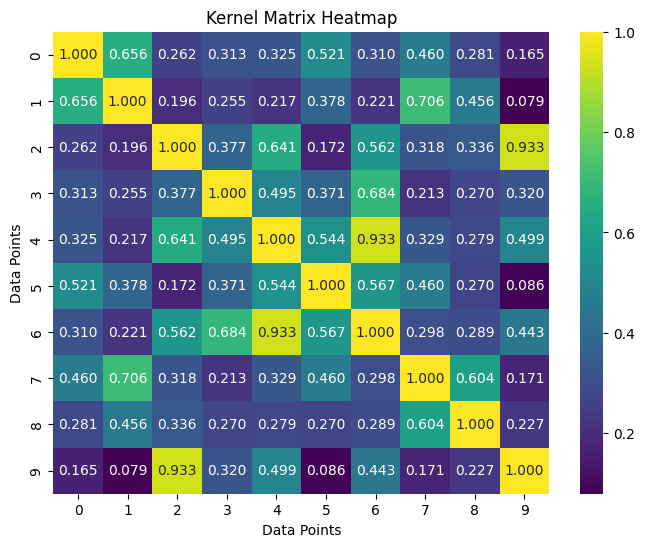

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(K_init, annot=True, fmt=".3f", cmap='viridis')
plt.title("Kernel Matrix Heatmap")
plt.xlabel("Data Points")
plt.ylabel("Data Points")
plt.show()

Eigenvalues:
 [0.026 0.046 0.185 0.325 0.386 0.624 0.75  1.205 1.896 4.557]


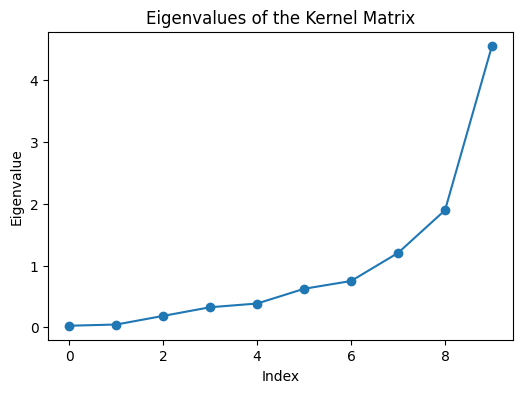

In [79]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eigh(K_init)

with np.printoptions(precision=3, suppress=True):
    print("Eigenvalues:\n", eigenvalues)

plt.figure(figsize=(6, 4))
plt.plot(eigenvalues, marker='o')
plt.title("Eigenvalues of the Kernel Matrix")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.show()

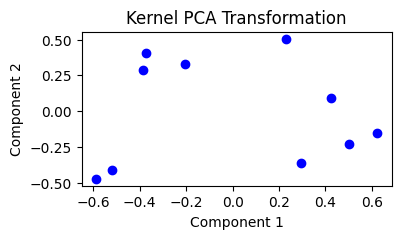

In [80]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel="precomputed")
transformed_data = kpca.fit_transform(K_init)

plt.figure(figsize=(4, 2))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='blue', marker='o')
plt.title("Kernel PCA Transformation")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [81]:
def most_similar_points(kernel_matrix, point_index, top_n=3):
    similarities = kernel_matrix[point_index]
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    return similar_indices

similar_points = most_similar_points(K_init, 0, top_n=3)
print(f"Top 3 points most similar to point 0: {similar_points}")

Top 3 points most similar to point 0: [1 5 7]


Shape of X: (10, 2), Shape of Y: (10,)
The accuracy of the kernel with random parameters is 0.500


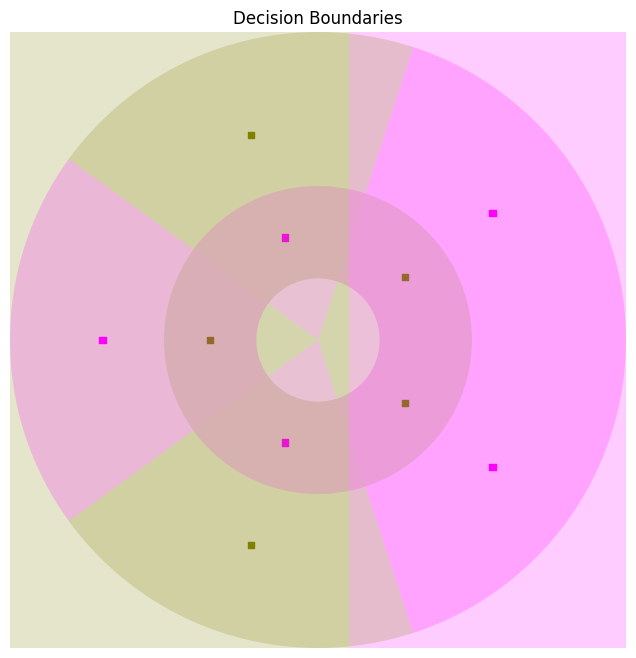

In [82]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.svm import SVC

num_sectors = 5
X, Y = make_double_cake_data(num_sectors)

def init_kernel(X1, X2):
    return np.dot(X1, X2.T)

print(f"Shape of X: {X.shape}, Shape of Y: {Y.shape}")

svm = SVC(kernel=init_kernel).fit(X, Y)

def accuracy(classifier, X, Y_target):
    return classifier.score(X, Y_target)

accuracy_init = accuracy(svm, X, Y)
print(f"The accuracy of the kernel with random parameters is {accuracy_init:.3f}")

def plot_decision_boundaries(classifier, ax, N_gridpoints=100):
    _xx, _yy = np.meshgrid(np.linspace(-1, 1, N_gridpoints), np.linspace(-1, 1, N_gridpoints))
    _zz = classifier.predict(np.c_[_xx.ravel(), _yy.ravel()]).reshape(_xx.shape)

    ax.contourf(
        _xx,
        _yy,
        _zz,
        cmap=mpl.colors.ListedColormap(["#FF00FF", "#808000"]),
        alpha=0.2,
        levels=[-1, 0, 1],
    )
    plot_double_cake_data(X, Y, ax, num_sectors=5)

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.axis('off')

    return _xx, _yy, _zz

fig, ax = plt.subplots(figsize=(8, 8))
_ = plot_decision_boundaries(svm, ax)
plt.title('Decision Boundaries')
plt.show()


In [83]:
import pennylane as qml
from pennylane import numpy as np

def differentiable_target_alignment(X, Y, kernel, assume_normalized_kernel=False):
    """Differentiable version of kernel-target alignment."""
    K = qml.kernels.square_kernel_matrix(X, kernel, assume_normalized_kernel=assume_normalized_kernel)
    n_samples = len(X)

    if np.unique(Y).size > 1:
        _Y = Y.copy()
        _Y[Y == np.unique(Y)[0]] = -1
        _Y[Y == np.unique(Y)[1]] = 1
    else:
        _Y = Y

    T = np.outer(_Y, _Y)
    inner_product = np.sum(K * T)
    norm = np.sqrt(np.sum(K * K) * np.sum(T * T))
    inner_product = inner_product / norm

    return inner_product


In [84]:
def kernel(x1, x2, params):
    ansatz(x1, params, wires=wires)
    adjoint_ansatz(x2, params, wires=wires)
    return kernel_circuit(x1, x2, params)[0]

In [85]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.svm import SVC

def layer(x, params, wires, i0=0, inc=1):
    i = i0
    for j, wire in enumerate(wires):
        qml.Hadamard(wires=wire)
        qml.RZ(x[i % len(x)], wires=wire)
        i += inc
        qml.RY(params[0, j], wires=wire)

    qml.broadcast(unitary=qml.CRZ, pattern="ring", wires=wires, parameters=params[1])

def ansatz(x, params, wires):
    for j, layer_params in enumerate(params):
        layer(x, layer_params, wires, i0=j * len(wires))

adjoint_ansatz = qml.adjoint(ansatz)

def kernel(x1, x2, params):
    ansatz(x1, params, wires=wires)
    adjoint_ansatz(x2, params, wires=wires)
    return qml.probs(wires=wires)[0]

def random_params(num_wires, num_layers):
    return np.random.uniform(0, 2 * np.pi, (num_layers, 2, num_wires), requires_grad=True)

dev = qml.device("default.qubit", wires=5, shots=None)
wires = dev.wires.tolist()

@qml.qnode(dev)
def kernel_circuit(x1, x2, params):
    ansatz(x1, params, wires=wires)
    adjoint_ansatz(x2, params, wires=wires)
    return qml.probs(wires=wires)

def kernel(x1, x2, params):
    return kernel_circuit(x1, x2, params)[0]

init_params = random_params(num_wires=5, num_layers=2)


In [86]:
params = init_params
opt = qml.GradientDescentOptimizer(0.2)

for i in range(100):
    subset = np.random.choice(len(X), 2, replace=False)

    cost = lambda _params: -differentiable_target_alignment(
        X[subset], Y[subset],
        lambda x1, x2: kernel(x1, x2, _params),
        assume_normalized_kernel=True
    )

    params = opt.step(cost, params)

    if (i + 1) % 10 == 0:
        current_alignment = differentiable_target_alignment(
            X, Y,
            lambda x1, x2: kernel(x1, x2, params),
            assume_normalized_kernel=True
        )
        print(f"Step {i+1} - Alignment = {current_alignment:.3f}")

Step 10 - Alignment = 0.016
Step 20 - Alignment = 0.016
Step 30 - Alignment = 0.016
Step 40 - Alignment = 0.016
Step 50 - Alignment = 0.016
Step 60 - Alignment = 0.016
Step 70 - Alignment = 0.016
Step 80 - Alignment = 0.017
Step 90 - Alignment = 0.016
Step 100 - Alignment = 0.017


In [87]:
trained_kernel = lambda x1, x2: kernel(x1, x2, params)

trained_kernel_matrix = lambda X1, X2: qml.kernels.kernel_matrix(X1, X2, trained_kernel)

svm_trained = SVC(kernel=trained_kernel_matrix).fit(X, Y)

accuracy_trained = accuracy(svm_trained, X, Y)
print(f"The accuracy of a kernel with trained parameters is {accuracy_trained:.3f}")

The accuracy of a kernel with trained parameters is 0.800


In [ ]:
from joblib import Parallel, delayed

def plot_decision_boundaries(classifier, X, Y, ax, N_gridpoints=50):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, N_gridpoints),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, N_gridpoints))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    def compute_kernel_row(gp):
        return np.array([trained_kernel(gp, xp) for xp in X])

    K_grid = np.array(Parallel(n_jobs=-1)(delayed(compute_kernel_row)(gp) for gp in grid_points))

    Z = classifier.predict(K_grid)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('Decision Boundaries for SVM with Trained Parameters')

fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_boundaries(svm_trained, X, Y, ax)
plt.show()

In [89]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.svm import SVC

def layer(x, params, wires, i0=0, inc=1):
    i = i0
    for j, wire in enumerate(wires):
        qml.Hadamard(wires=wire)
        qml.RZ(x[i % len(x)], wires=wire)
        i += inc
        qml.RY(params[0, j], wires=wire)

    qml.broadcast(unitary=qml.CRZ, pattern="ring", wires=wires, parameters=params[1])

def ansatz(x, params, wires):
    for j, layer_params in enumerate(params):
        layer(x, layer_params, wires, i0=j * len(wires))

adjoint_ansatz = qml.adjoint(ansatz)

def kernel(x1, x2, params):
    ansatz(x1, params, wires=wires)
    adjoint_ansatz(x2, params, wires=wires)
    return qml.probs(wires=wires)[0]

def random_params(num_wires, num_layers):
    return np.random.uniform(0, 2 * np.pi, (num_layers, 3, num_wires), requires_grad=True)

dev = qml.device("default.qubit", wires=5, shots=None)
wires = dev.wires.tolist()

@qml.qnode(dev)
def kernel_circuit(x1, x2, params):
    ansatz(x1, params, wires=wires)
    adjoint_ansatz(x2, params, wires=wires)
    return qml.probs(wires=wires)

def kernel(x1, x2, params):
    return kernel_circuit(x1, x2, params)[0]

init_params = random_params(num_wires=5, num_layers=3)


In [90]:
params = init_params
opt = qml.GradientDescentOptimizer(0.2)

for i in range(200):
    subset = np.random.choice(len(X), 2, replace=False)

    cost = lambda _params: -differentiable_target_alignment(
        X[subset], Y[subset],
        lambda x1, x2: kernel(x1, x2, _params),
        assume_normalized_kernel=True
    )

    params = opt.step(cost, params)

    if (i + 1) % 20 == 0:
        current_alignment = differentiable_target_alignment(
            X, Y,
            lambda x1, x2: kernel(x1, x2, params),
            assume_normalized_kernel=True
        )
        print(f"Step {i+1} - Alignment = {current_alignment:.3f}")


Step 20 - Alignment = 0.018
Step 40 - Alignment = 0.019
Step 60 - Alignment = 0.019
Step 80 - Alignment = 0.019
Step 100 - Alignment = 0.021
Step 120 - Alignment = 0.022
Step 140 - Alignment = 0.024
Step 160 - Alignment = 0.025
Step 180 - Alignment = 0.026
Step 200 - Alignment = 0.027


In [91]:
trained_kernel = lambda x1, x2: kernel(x1, x2, params)

trained_kernel_matrix = lambda X1, X2: qml.kernels.kernel_matrix(X1, X2, trained_kernel)

svm_trained = SVC(kernel=trained_kernel_matrix).fit(X, Y)

accuracy_trained = accuracy(svm_trained, X, Y)
print(f"The accuracy of a kernel with trained parameters is {accuracy_trained:.3f}")


The accuracy of a kernel with trained parameters is 0.700


In [92]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def trained_kernel(x1, x2):
    return kernel(x1, x2, params)

def kernel_matrix(X1, X2, kernel_func):
    return np.array([[kernel_func(x1, x2) for x2 in X2] for x1 in X1])

X_transformed = kernel_matrix(X, X, trained_kernel)


In [93]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_transformed, Y)

Y_pred = rf_clf.predict(X_transformed)
accuracy_trained = accuracy_score(Y, Y_pred)
print(f"The accuracy of a kernel with trained parameters is {accuracy_trained:.3f}")


The accuracy of a kernel with trained parameters is 1.000


In [ ]:
def plot_decision_boundaries(X, y, classifier, kernel_func, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z_transformed = kernel_matrix(grid_points, X, kernel_func)

    Z = classifier.predict(Z_transformed)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title("Decision Boundaries with Custom Kernel and Random Forest")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundaries(X, Y, rf_clf, trained_kernel)

In [95]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def trained_kernel(x1, x2):
    return kernel(x1, x2, params)

def kernel_matrix(X1, X2, kernel_func):
    return np.array([[kernel_func(x1, x2) for x2 in X2] for x1 in X1])

def custom_distance(x1, x2):
    return trained_kernel(x1, x2)

X_transformed = kernel_matrix(X, X, trained_kernel)

In [96]:
from scipy.spatial.distance import pdist, squareform

distance_matrix = squareform(pdist(X_transformed, metric=custom_distance))

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='precomputed')
knn_clf.fit(distance_matrix, Y)

Y_pred = knn_clf.predict(distance_matrix)
accuracy_trained = accuracy_score(Y, Y_pred)
print(f"The accuracy of a kernel with trained parameters is {accuracy_trained:.3f}")


The accuracy of a kernel with trained parameters is 1.000
